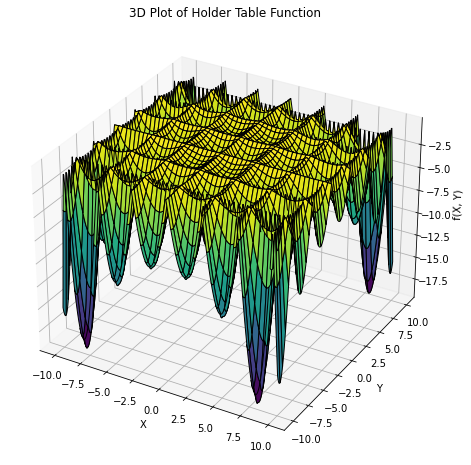

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Define the function
def holder_table(x, y):
    return -abs(np.sin(x) * np.cos(y) * np.exp(abs(1 - np.sqrt(x**2 + y**2) / np.pi)))

# Create an array of x and y values
x = np.linspace(-10, 10, 400)
y = np.linspace(-10, 10, 400)

# Create a grid of x and y values
x, y = np.meshgrid(x, y)

# Calculate the z values
z = holder_table(x, y)

# Create the plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(x, y, z, cmap='viridis', edgecolor='k')
ax.set_title('3D Plot of Holder Table Function')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('f(X, Y)')
plt.savefig('3D Holder Table Function')
plt.show()

In [5]:
class TableHolder:
    '''
    This class represents the likelihood function based on the TableHolder function
    
    '''
    def __init__(self):
        '''
        Initialize the class with bounds for the x and y variables
        '''
        # Bounds for x and y variables
        self.bounds = [(-10, 10), (-10, 10)]
        
    def TableHolder(self, x, y):
        '''
        Evaluates the TableHolder function at the given (x, y) coordinates

        Arguments
        x [float]: The x coordinate
        y [float]: The y coordinate

        Returns
        fxy [float]: The value of the TableHolder function at (x, y)
        '''
        fxy = -abs(np.sin(x) * np.cos(y) * np.exp(abs(1 - np.sqrt(x**2 + y**2) / np.pi)))
        return fxy
    
    def evaluate(self, params):
        '''
        Evaluates the TableHolder function at the given (x, y) coordinates

        Arguments
        params [tuple]: The parameter values (x, y) for the TableHolder function

        Returns
        fxy [float]: The value of the TableHolder function at (x, y)
        '''
        x, y = params
        fxy = self.TableHolder(x, y)
        return fxy


    def log_likelihood(self, params, z_observed):
        '''
        Calculates the log likelihood value based on the observed and predicted values

        Arguments
        params [tuple]: The parameter values (x, y) for the TableHolder function
        z_observed [array]: The observed values of the TableHolder function

        Returns
        log_likelihood [float]: The log-likelihood value
        '''
        x, y = params
        z_predicted = self.evaluate(params)
        log_likelihood = -0.5 * np.sum((z_observed - z_predicted) ** 2)
        return log_likelihood

    def log_prior(self, params):
        '''
        Calculates the log prior probability based on the parameter values

        Arguments
        params [tuple]: The parameter values (x, y) for the TableHolder function

        Returns
        log_prior [float]: The log-prior probability
        '''
        x, y = params
        if self.bounds[0][0] <= x <= self.bounds[0][1] and self.bounds[1][0] <= y <= self.bounds[1][1]:
            return 0.0
        else:
            return -np.inf

    def log_posterior(self, params, z_observed):
        '''
        Calculates the log posterior probability based on the parameter values and observed values

        Arguments
        params [tuple]: The parameter values (x, y) for the TableHolder function
        z_observed [array-like]: The observed values of the TableHolder function

        Returns:
        log_posterior [float]: The log-posterior probability
        '''
        log_prior = self.log_prior(params)
        if np.isinf(log_prior):
            return log_prior
        log_likelihood = self.log_likelihood(params, z_observed)
        return log_prior + log_likelihood
    
    def add_poisson_fluctuation(self, z):
        '''
        Adds Poisson fluctuation to the TableHolder values

        Arguments
        z [array]: The values of the TableHolder function

        Returns
        z_fluctuated [array]: The fluctuated values of the TableHolder function
        '''
        offset = np.abs(np.min(z))
        z_offset = z + offset
        z_fluctuated = np.random.poisson(z_offset)
        z_fluctuated -= np.array(offset, dtype=z_fluctuated.dtype)
        return z_fluctuated

    def plot_scatter(self):
        '''
        Creates a 3D scatter plot of the TableHolder function with Poisson fluctuation
        '''
        
        # Create an array of x and y values
        x = np.linspace(-10, 10, 400)
        y = np.linspace(-10, 10, 400)

        # Create a grid of x and y values
        x, y = np.meshgrid(x, y)

        # Calculate the z values
        z = self.TableHolder(x, y)

        # Add Poisson fluctuation to z values
        z_fluctuated = self.add_poisson_fluctuation(z)

        # Create the plot
        fig = plt.figure(figsize=(15, 10))
        ax = fig.add_subplot(111, projection='3d')
        #ax.plot_surface(x, y, z, cmap='viridis', edgecolor='k')
        #ax.set_title('3D Plot of Table Holder Function without Poisson Fluctuation')
        ax.plot_surface(x, y, z_fluctuated, cmap='viridis', edgecolor='k')
        ax.set_title('3D Plot of Table Holder Function with Poisson Fluctuation')
        ax.set_xlabel('x')
        ax.set_ylabel('y')
        ax.set_zlabel('f(x, y)')
        plt.savefig('3D Table Holder Function with Poisson Fluctuation')
        plt.show()
        
    def plot_heatmap(self):
        '''
        Creates a 2D heatmap of the TableHolder function with Poisson fluctuation
        '''
        x = np.linspace(-10, 10, 400)
        y = np.linspace(-10, 10, 400)
        X, Y = np.meshgrid(x, y)
        z = self.TableHolder(X, Y)

        # Add Poisson fluctuation to z values
        z_fluctuated = self.add_poisson_fluctuation(z)

        # Create the plot
        plt.figure(figsize=(10, 8))
        #plt.imshow(z, cmap='viridis', extent=[-10, 10, -10, 10], origin='lower')
        plt.imshow(z_fluctuated, cmap='viridis', extent=[-10, 10, -10, 10], origin='lower')
        plt.colorbar(label='f(x, y)')
        plt.xlabel('x')
        plt.ylabel('y')
        #plt.title('2D Heatmap of TableHolder Function without Poisson Fluctuation')
        plt.title('2D Heatmap of Table Holder Function with Poisson Fluctuation')
        plt.savefig('TableHolder_heatmap')
        plt.show()
        
        
    def find_peaks(self, num_points=100):
        '''
        Finds the number of peaks in the TableHolder function

        Arguments
        num_points [int]: The number of points to evaluate the function

        Returns
        peaks [int]: The number of peaks in the function
        peak_coordinates [list]: The coordinates of the peaks in the function
        '''
        x = np.linspace(-10, 10, num_points)
        y = np.linspace(-10, 10, num_points)
        X, Y = np.meshgrid(x, y)
        z = self.TableHolder(X, Y)

        peaks = 0
        peak_coordinates = []
        for i in range(1, num_points - 1):
            for j in range(1, num_points - 1):
                if (
                z[i, j] > z[i-1, j] and z[i, j] > z[i+1, j] and
                z[i, j] > z[i, j-1] and z[i, j] > z[i, j+1]
            ):
                    peaks += 1
                    peak_coordinates.append((X[i, j], Y[i, j]))
        return peaks, peak_coordinates

    def find_troughs(self, num_points=100):
        '''
        Finds the number of troughs in the TableHolder function

        Arguments
        num_points [int]: The number of points to evaluate the function

        Returns
        troughs [int]: The number of troughs in the function
        trough_coordinates [list]: The coordinates of the troughs in the function
        '''
        x = np.linspace(-10, 10, num_points)
        y = np.linspace(-10, 10, num_points)
        X, Y = np.meshgrid(x, y)
        z = self.TableHolder(X, Y)

        troughs = 0
        trough_coordinates = []

        for i in range(1, num_points - 1):
            for j in range(1, num_points - 1):
                if (
                    z[i, j] < z[i-1, j] and z[i, j] < z[i+1, j] and
                    z[i, j] < z[i, j-1] and z[i, j] < z[i, j+1]
                ):
                    troughs += 1
                    trough_coordinates.append((X[i, j], Y[i, j]))

        return troughs, trough_coordinates

    
    def find_local_minimum(self, start_point, learning_rate=0.01, num_iterations=100):
        '''
        Finds a local minimum of the TableHolderdouble well potential function starting from the given start_point

        Arguments
        start_point [tuple]: The starting point (x, y) for the optimization
        learning_rate [float]: The learning rate for gradient descent
        num_iterations [int]: The number of iterations for gradient descent

        Returns
        current_point [tuple]: The coordinates (x, y) of the local minimum
        history [list]: The history of points visited during the optimization process
        '''

        current_point = np.array(start_point)
        history = [current_point]

        for _ in range(num_iterations):
            x, y = current_point
            #grad_x = 4*a*x**3 - 2*b*x
            #grad_y = 0
            gradient = np.array([grad_x, grad_y])
            current_point = current_point - learning_rate * gradient
            history.append(current_point)

        return current_point, history

In [6]:
# Instantiate the TableHolder Likelihood class
TableHolder = TableHolder()

# Choose parameter values for testing
params = (-2.5, 2)  # Example parameter values
print("(x,y) =", params)

# Calculate the likelihood
likelihood_value = TableHolder.evaluate(params)
print("f(x,y) =", likelihood_value)

# Generate random observed z values
np.random.seed(42)  # Set random seed for reproducibility
z_observed = np.random.uniform(-100, 100, size=(10, 10))

# Calculate the log-likelihood
log_likelihood_value = TableHolder.log_likelihood(params, z_observed)
print("Total Log-Likelihood =", log_likelihood_value)

# Calculate the prior
prior_value = TableHolder.log_prior(params)
print("Prior =", prior_value)

# Calculate the posterior
posterior_value = TableHolder.log_posterior(params, z_observed)
print("Posterior =", posterior_value)

(x,y) = (-2.5, 2)
f(x,y) = -0.2538520827863608
Total Log-Likelihood = -176860.10490609577
Prior = 0.0
Posterior = -176860.10490609577


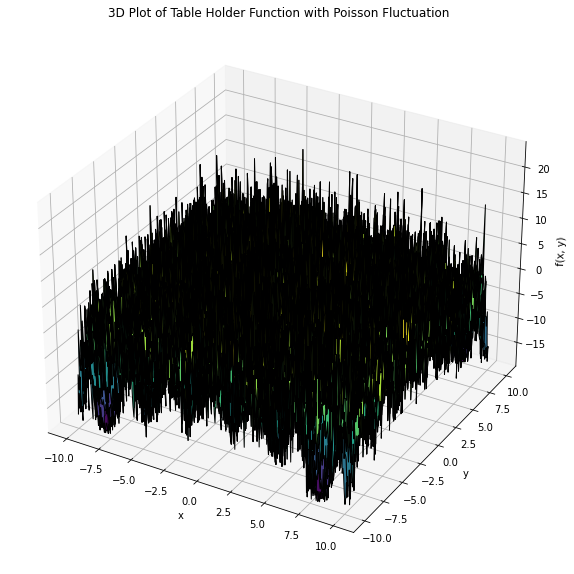

In [8]:
# Plot the 3D plot
TableHolder.plot_scatter()

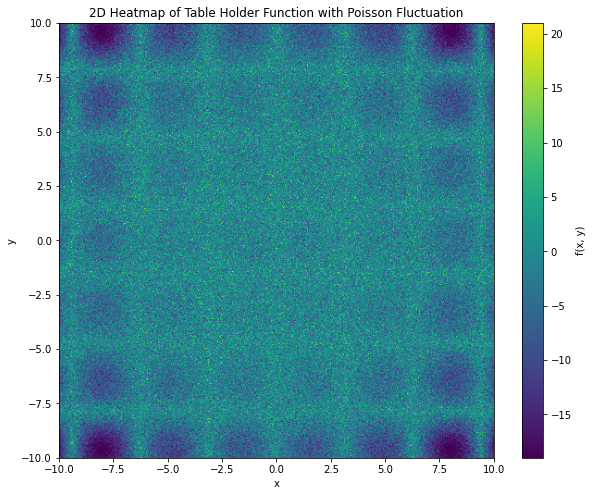

In [10]:
# Create the 2D heatmap
TableHolder.plot_heatmap()

In [11]:
# Find the number of peaks
num_peaks, peak_coordinates = TableHolder.find_peaks()
print("Number of peaks:", num_peaks)

print("Peak coordinates and their likelihood values:")
for coordinate in peak_coordinates:
    likelihood_value = TableHolder.evaluate(coordinate)
    print("(x,y) =", coordinate, ", f(x,y) =", likelihood_value)

Number of peaks: 36
Peak coordinates and their likelihood values:
(x,y) = (-9.393939393939394, -7.777777777777778) , f(x,y) = -0.04190357687138944
(x,y) = (-6.363636363636363, -7.777777777777778) , f(x,y) = -0.055150751471195185
(x,y) = (-3.1313131313131315, -7.777777777777778) , f(x,y) = -0.004152361731068127
(x,y) = (3.1313131313131315, -7.777777777777778) , f(x,y) = -0.004152361731068127
(x,y) = (6.363636363636363, -7.777777777777778) , f(x,y) = -0.055150751471195185
(x,y) = (9.393939393939394, -7.777777777777778) , f(x,y) = -0.04190357687138944
(x,y) = (-9.393939393939394, -4.747474747474747) , f(x,y) = -0.011345147728111318
(x,y) = (-6.363636363636363, -4.747474747474747) , f(x,y) = -0.012982481898581887
(x,y) = (-3.1313131313131315, -4.747474747474747) , f(x,y) = -0.0008107839290354829
(x,y) = (3.1313131313131315, -4.747474747474747) , f(x,y) = -0.0008107839290354829
(x,y) = (6.363636363636363, -4.747474747474747) , f(x,y) = -0.012982481898581887
(x,y) = (9.393939393939394, -4.74

In [12]:
# Find the number of troughs
num_troughs, trough_coordinates = TableHolder.find_troughs()
print("Number of troughs:", num_troughs)
print()


print("Trough coordinates and their likelihood values:")
for coordinate in trough_coordinates:
    likelihood_value = TableHolder.evaluate(coordinate)
    print("(x,y) =", coordinate, ", f(x,y) =", likelihood_value)

Number of troughs: 36

Trough coordinates and their likelihood values:
(x,y) = (-4.94949494949495, -9.797979797979798) , f(x,y) = -10.9620633230983
(x,y) = (-1.717171717171718, -9.797979797979798) , f(x,y) = -8.03862828482308
(x,y) = (1.7171717171717162, -9.797979797979798) , f(x,y) = -8.038628284823082
(x,y) = (4.94949494949495, -9.797979797979798) , f(x,y) = -10.9620633230983
(x,y) = (-7.979797979797979, -9.595959595959595) , f(x,y) = -19.10529208177748
(x,y) = (7.979797979797979, -9.595959595959595) , f(x,y) = -19.10529208177748
(x,y) = (-8.181818181818182, -6.565656565656566) , f(x,y) = -9.431490926834927
(x,y) = (-4.94949494949495, -6.565656565656566) , f(x,y) = -4.703977306454262
(x,y) = (-1.717171717171718, -6.565656565656566) , f(x,y) = -3.0313868813195333
(x,y) = (1.7171717171717162, -6.565656565656566) , f(x,y) = -3.0313868813195346
(x,y) = (4.94949494949495, -6.565656565656566) , f(x,y) = -4.703977306454262
(x,y) = (8.18181818181818, -6.565656565656566) , f(x,y) = -9.4314909

In [13]:
# Find the global minimum

min_likelihood = float('inf')  # Initialize with a large value
min_coordinate = None

for coordinate in trough_coordinates:
    likelihood_value = TableHolder.evaluate(coordinate)
    if likelihood_value < min_likelihood:
        min_likelihood = likelihood_value
        min_coordinate = coordinate

print("Global minimum:")
print("(x,y):", min_coordinate)
print("f(x,y):", min_likelihood)

Global minimum:
(x,y): (-7.979797979797979, -9.595959595959595)
f(x,y): -19.10529208177748
